<a href="https://colab.research.google.com/github/aadiharan99/NLP_work/blob/master/NLP_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import re
from nltk import sentiment
from nltk.corpus import stopwords
import itertools
import nltk

In [21]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from wordcloud import WordCloud,STOPWORDS


In [0]:
# stopwords=set(STOPWORDS)
sw=stopwords.words('english')

In [24]:
data=pd.read_json('http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Office_Products_5.json.gz',lines=True)
data

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004"
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007"
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011"
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006"
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013"
...,...,...,...,...,...,...,...,...,...
53253,A1ODOGXEYECQQ8,B00KYA0RC2,Nuknuk,"[0, 0]",What I like about this scale is you can power ...,4,Portable and very easy to use,1405555200,"07 17, 2014"
53254,A2XX2A4OJCDNLZ,B00KYA0RC2,RatherLiveInKeyWest,"[2, 2]",This Accuteck ShipPro digital scale works very...,5,Accuteck ShipPro Digital Postal Scale - Stand-...,1405296000,"07 14, 2014"
53255,A3LGT6UZL99IW1,B00KYA0RC2,"Richard C. Drew ""Anaal Nathra/Uthe vas Bethod...","[1, 1]","I ship a lot of stuff. I sell small parts, ma...",5,"Extremely accurate, foolproof postal/shipping ...",1405468800,"07 16, 2014"
53256,A1XJOSJN6FHFO0,B00KYA0RC2,"Shirley Priscilla Johnson ""Author/Reviewer -...","[0, 0]",This is a great little scale to have. It can w...,5,"Fast, Easy and Accurate",1405814400,"07 20, 2014"


In [0]:
# data['reviewText'][170]

"I purchased this mouse pad for playing Starcraft 2 and it works just fine as it provides smooth operation with an Anker Lazer Gaming Mouse.  The mouse pad doesn't move around at all on my desk during frantic game playing and is a good size.  The price of $2.99 (as an adder) can't be beat even though I'm curious as to how long it will last compared to more expensive ones."

In [0]:
revtxt=list(data.reviewText)

In [26]:
revtxt

["I bought my first HP12C in about 1984 or so, and it served me faithfully until 2002 when I lost it while travelling.  I searched for another one to replace it, but found one difficult to come by in my area.  So, I decided to buy up and purchased an HP 49G.  What a mistake!  I know that many people view the HP 49G (now 49G+) as the flagship of the HP line, but for me that was a disaster.The 49G may be powerful, but using it is extremely counterintuitive...and the manual was sketchy at best.  The 12C, on the other hand, does what I need in a way that makes good sense to me.If you are looking for a solid, reliable calculator, the HP12C may be for you.  It's programmable.  It does basic statistics well, and many business applications too.  The manual makes sense; you will be up and running in short order.I'm ready to set my 49G aside and move back to my old friend.  I didn't even have to replace the batteries in well over a decade of use!HP 12C, I'm coming home!",
 'WHY THIS BELATED REVI

In [0]:
revtxt_tokens=nltk.word_tokenize(str(revtxt).lower())
revtxt_tokens=[word.lower() for word in revtxt_tokens if word.isalpha()]

review_tokens=[w for w in revtxt_tokens if not w in sw]

In [32]:
# review_tokens
len(review_tokens)

3675499

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = sw, 
                min_font_size = 10).generate(str(review_tokens))

In [0]:
import matplotlib.pyplot as plt


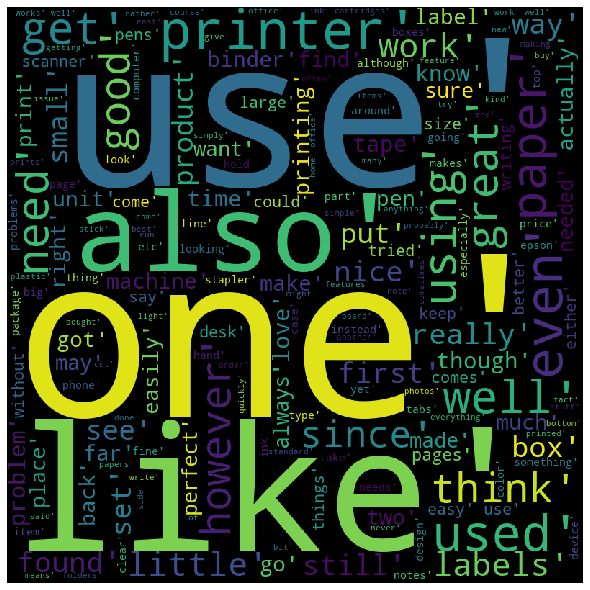

In [31]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

similarity:  0.15453063444227516


In [0]:
def sim_finder(text1,text2):
  l1=[]
  l2=[]
  text_tokens1=nltk.word_tokenize(text1)
  text_tokens1={word.lower() for word in text_tokens1 if word.isalpha()}
  text_tokens1={w for w in text_tokens1 if not w in sw}
  text_tokens2=nltk.word_tokenize(text2)
  text_tokens2={word.lower() for word in text_tokens2 if word.isalpha()}
  text_tokens2={w for w in text_tokens2 if not w in sw}
  rvector = text_tokens1.union(text_tokens2)
  for w in rvector: 
    if w in text_tokens1: l1.append(1) # create a vector 
    else: l1.append(0) 
    if w in text_tokens2: l2.append(1) 
    else: l2.append(0) 
  c = 0
  for i in range(len(rvector)): 
        c+= l1[i]*l2[i] 
  cosine = c / float((sum(l1)*sum(l2))**0.5)
  return cosine




  


ZeroDivisionError: ignored

In [0]:

sim_list1=[]


In [0]:
for i in range(0,99):
  for j in range(1,100):
    sim_list1.append(sim_finder(data['reviewText'][i],data['reviewText'][j]))
 


In [58]:
sim_list1

[0.10853039276555741,
 0.08574929257125441,
 0.120474968393765,
 0.15453063444227516,
 0.1504823163572115,
 0.1473139127471974,
 0.08838834764831845,
 0.09847982464479191,
 0.07216878364870323,
 0.125,
 0.1417366773784602,
 0.07995026863335392,
 0.16269784336399212,
 0.18515322416288205,
 0.08603090020146065,
 0.018844459036110227,
 0.15467960838455727,
 0.08333333333333333,
 0.08603090020146065,
 0.08183170883849715,
 0.10714285714285714,
 0.05590169943749474,
 0.05892556509887897,
 0.07071067811865475,
 0.0625,
 0.04801382997483599,
 0.11785113019775793,
 0.1767766952966369,
 0.053300179088902604,
 0.04902903378454601,
 0.11225331376673432,
 0.05892556509887897,
 0.05892556509887897,
 0.06565321642986127,
 0.19245008972987526,
 0.08838834764831843,
 0.04490132550669373,
 0.0625,
 0.0545544725589981,
 0.14771973696718788,
 0.08333333333333333,
 0.11481983169296148,
 0.12711879496828166,
 0.16204530402191716,
 0.07905694150420949,
 0.06933752452815364,
 0.0,
 0.0545544725589981,
 0.139

In [0]:
data1=data.iloc[0:100]

In [41]:
len(sim_list1)

100

In [0]:
cols=['revtxt_sims']

In [0]:
df1=pd.DataFrame(sim_list1,columns=cols)

In [45]:
df1.head()

,revtxt_sims
0,0.108530
1,0.063815
2,0.129871
3,0.160757
4,0.198435


In [0]:
data1=data1.join(df1)

In [48]:
data1

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,revtxt_sims
0,A32T2H8150OJLU,B00000JBLH,ARH,"[3, 4]","I bought my first HP12C in about 1984 or so, a...",5,"A solid performer, and long time friend",1094169600,"09 3, 2004",0.108530
1,A3MAFS04ZABRGO,B00000JBLH,"Let it Be ""Alan""","[7, 9]",WHY THIS BELATED REVIEW? I feel very obliged t...,5,"Price of GOLD is up, so don't bury the golden ...",1197676800,"12 15, 2007",0.063815
2,A1F1A0QQP2XVH5,B00000JBLH,Mark B,"[3, 3]",I have an HP 48GX that has been kicking for mo...,2,"Good functionality, but not durable like old HPs",1293840000,"01 1, 2011",0.129871
3,A49R5DBXXQDE5,B00000JBLH,R. D Johnson,"[7, 8]",I've started doing more finance stuff recently...,5,One of the last of an almost extinct species,1145404800,"04 19, 2006",0.160757
4,A2XRMQA6PJ5ZJ8,B00000JBLH,Roger J. Buffington,"[0, 0]",For simple calculations and discounted cash fl...,5,Still the best,1375574400,"08 4, 2013",0.198435
...,...,...,...,...,...,...,...,...,...,...
95,A304GUEPCPYM3Z,B00000JZKB,"citan-uzuki ""citan-uzuki""","[0, 0]",This is a good calculator for those who are ta...,5,Standard tool for the business student,1392163200,"02 12, 2014",0.215365
96,A10JPZAYDGFHEV,B00000JZKB,Damian Marynski,"[0, 0]",I bought the calculator for Accounting classes...,4,Good for exams,1387497600,"12 20, 2013",0.040291
97,A8LEFDO3AKIJP,B00000JZKB,"D. Salotti ""DS""","[0, 0]",I got this calculator at request from my Corpo...,4,Easy to use - good calculator for Finance Classes,1365984000,"04 15, 2013",0.027277
98,AIKGBCYBXVH8I,B00000JZKB,John L. Holt,"[0, 0]",David Wilson: Thank you my man for your review...,4,HP 12C,1303084800,"04 18, 2011",0.072169
